In [1]:
#反折趨勢
# 兩紅夾一綠,兩綠夾一紅
# 黎明之星,黃昏之星

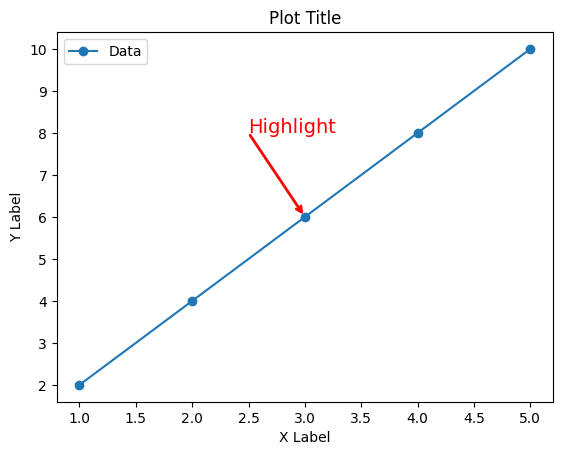

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate some sample data
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]})

# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.plot(data['x'], data['y'], 'o-', label='Data')

# Find the index of the point you want to highlight
highlight_index = 2

# Get the x and y coordinates of the point
highlight_x = data['x'][highlight_index]
highlight_y = data['y'][highlight_index]

# Annotate the point with a circle and a label
ax.annotate('',
            xy=(highlight_x, highlight_y),
            xytext=(highlight_x - 0.5, highlight_y + 2),
            arrowprops=dict(arrowstyle='->', lw=2, color='r'),
            annotation_clip=False)
ax.annotate('Highlight', (highlight_x - 0.5, highlight_y + 2),
            color='r', fontsize=14, annotation_clip=False)

# Add labels and legend
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Plot Title')
ax.legend()

plt.show()

[*********************100%***********************]  1 of 1 completed


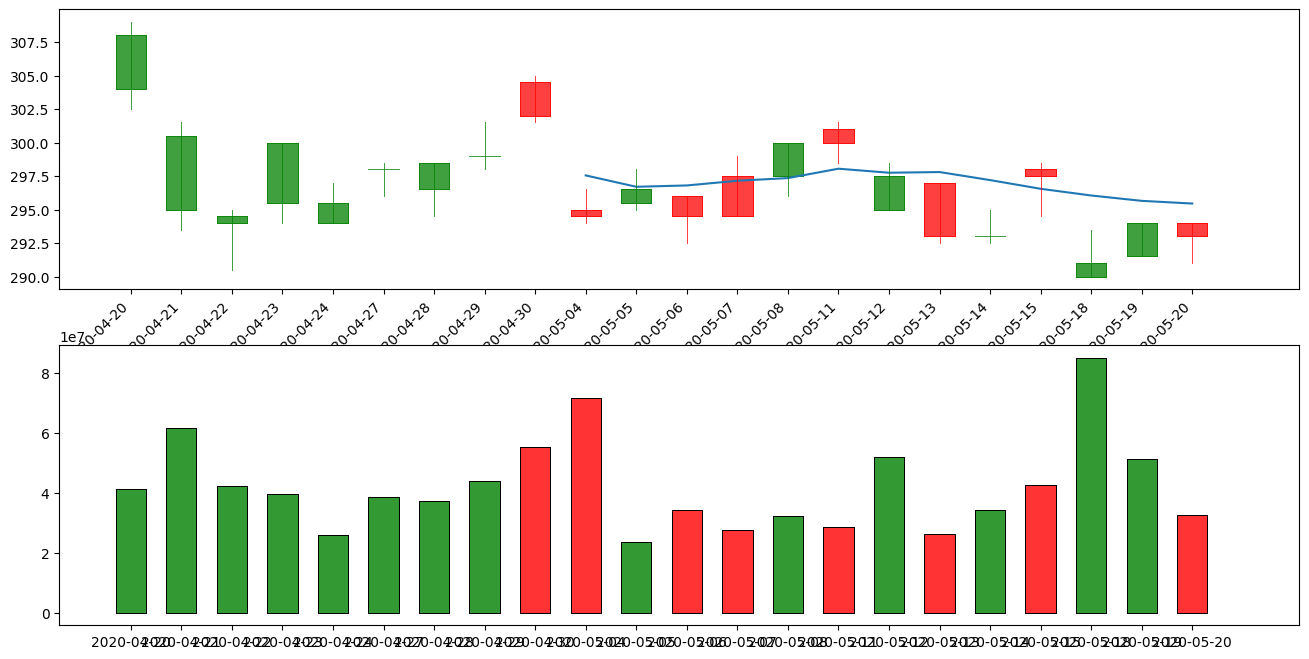

In [3]:
# 可自行輸入顯示時間區間的視窗化程式
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_finance as mpf
import seaborn as sns
import talib
import yfinance as yf
import datetime
from tkinter import *

# Download data from Yahoo Finance
df = yf.download('2330.TW', start='2020-01-01', end='2023-12-31')

def update_plot():
    start_date = start_date_entry.get()
    end_date = end_date_entry.get()
    # Convert index to string format with '%Y-%m-%d'
    df.index = df.index.strftime('%Y-%m-%d')
    df_selected = df.loc[start_date:end_date]
    #10日平均線30日平均線
    sma_10 = talib.SMA(np.array(df_selected['Close']), 10)
    sma_30 = talib.SMA(np.array(df_selected['Close']), 30)
    sma_60 = talib.SMA(np.array(df_selected['Close']), 60)
    # 創建圖形和坐標軸
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2, sharex=ax)
    # Set x-axis ticks and labels
    ax.set_xticks(range(0, len(df_selected.index), 1))
    ax.set_xticklabels(df_selected.index[::1], rotation=45, ha='right')
    #10日平均線30日平均線
    ax.plot(sma_10, label='10日均線')
    ax.plot(sma_30, label='30日均線')
    ax.plot(sma_60, label='60日均線')
    # Plot candlestick chart
    mpf.candlestick2_ochl(ax, df_selected['Open'], df_selected['Close'], df_selected['High'], df_selected['Low'],
                          width=0.6, colorup='r', colordown='g', alpha=0.75)
    # Plot volume chart
    mpf.volume_overlay(ax2, df_selected['Open'], df_selected['Close'], df_selected['Volume'],
                       colorup='r', colordown='g', width=0.6, alpha=0.8)
    plt.show()

# Create GUI
root = Tk()
root.geometry("300x150")
root.title("股票走勢圖")

start_date_label = Label(root, text="起始日期 (YYYY-MM-DD): ")
start_date_label.pack()
start_date_entry = Entry(root)
start_date_entry.pack()

end_date_label = Label(root, text="結束日期 (YYYY-MM-DD): ")
end_date_label.pack()
end_date_entry = Entry(root)
end_date_entry.pack()

submit_button = Button(root, text="顯示圖表", command=update_plot)
submit_button.pack()

root.mainloop()

[*********************100%***********************]  1 of 1 completed


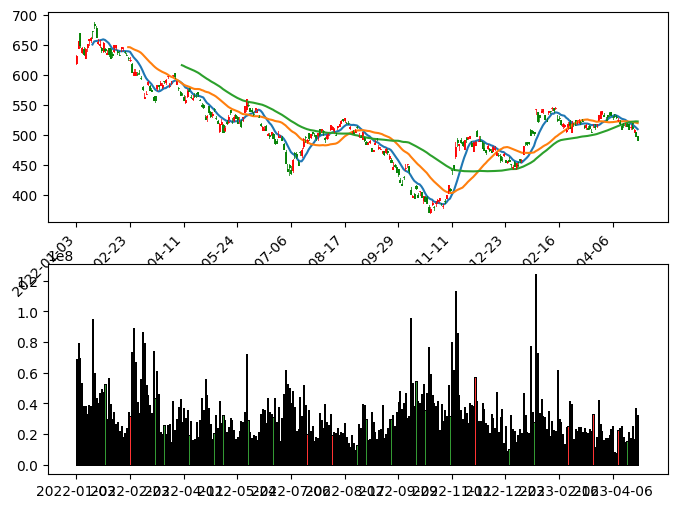

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_finance as mpf
import seaborn as sns
import talib
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Download data from Yahoo Finance
df = yf.download('2330.TW', start='2022-01-01', end='2023-12-31')

# Convert index to string format with '%Y-%m-%d'
df.index = df.index.strftime('%Y-%m-%d')

# Set up the window
root = tk.Tk()
root.title("Stock Chart")
root.geometry("800x600")

# Set up the figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax)

# Set x-axis ticks and labels
ax.set_xticks(range(0, len(df.index), 30))
ax.set_xticklabels(df.index[::30], rotation=45, ha='right')

# Calculate SMA
sma_10 = talib.SMA(np.array(df['Close']), 10)
sma_30 = talib.SMA(np.array(df['Close']), 30)
sma_60 = talib.SMA(np.array(df['Close']), 60)

# Plot SMA
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')
ax.plot(sma_60, label='60日均線')

# Plot candlestick chart
mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'], df['Low'],
                      width=0.6, colorup='r', colordown='g', alpha=0.75)

# Plot volume chart
mpf.volume_overlay(ax2, df['Open'], df['Close'], df['Volume'],
                   colorup='r', colordown='g', width=0.6, alpha=0.8)

# Set up the canvas and show the figure in the window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Add a button to close the window
button = tk.Button(master=root, text="Close", command=root.destroy)
button.pack(side=tk.BOTTOM)

# Show the window
tk.mainloop()

[*********************100%***********************]  1 of 1 completed


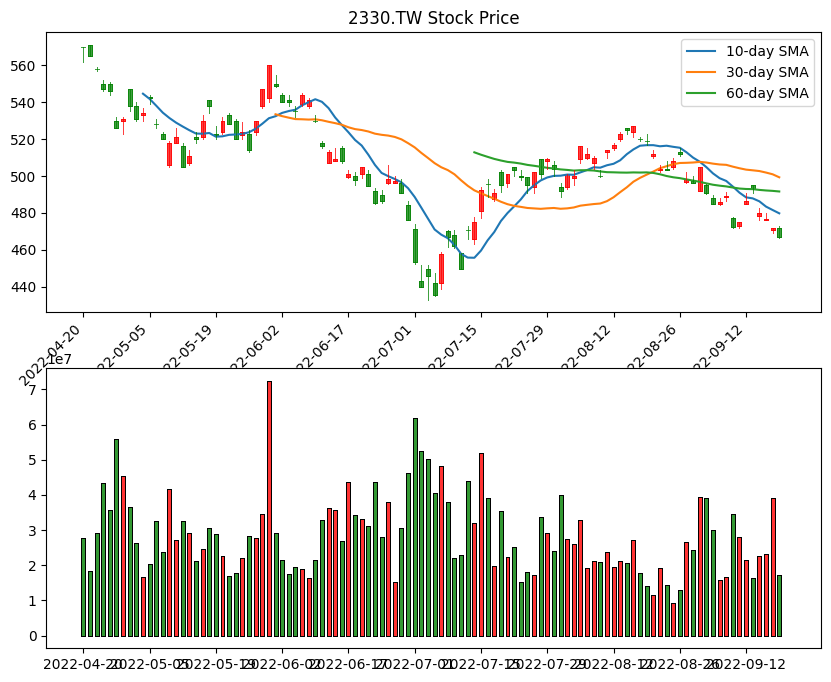

[*********************100%***********************]  1 of 1 completed


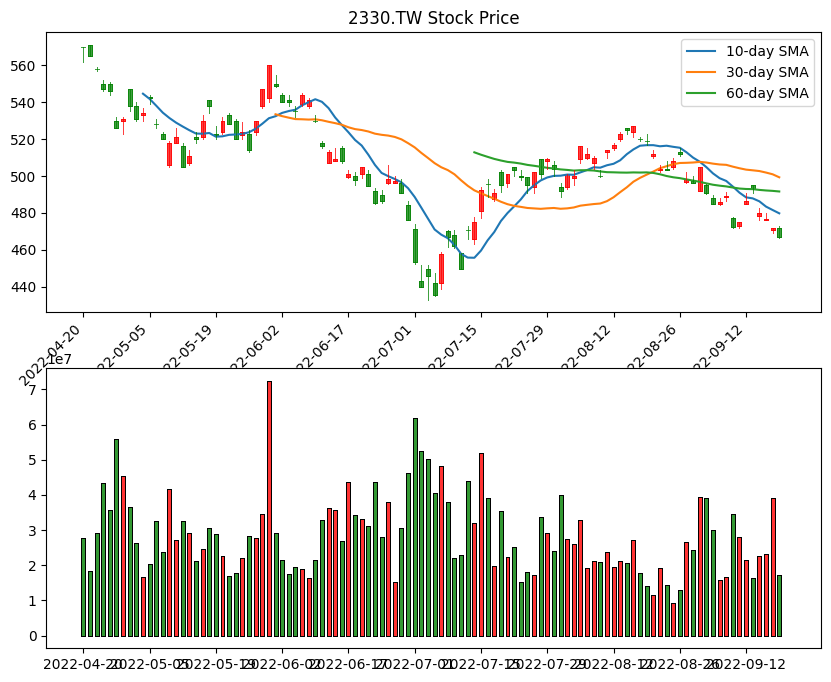

In [4]:
# 近乎完美,可惜顯示在JUPYTER中
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_finance as mpf
import seaborn as sns
import talib
import yfinance as yf
from datetime import datetime
from tkinter import *
import tkinter as tk
def plot_stock():
    # get the ticker symbol and time period from the entries
    ticker = entry_ticker.get()
    start_date = datetime.strptime(entry_start_date.get(), '%Y-%m-%d')
    end_date = datetime.strptime(entry_end_date.get(), '%Y-%m-%d')
    
    # download data from Yahoo Finance
    df = yf.download(ticker, start=start_date, end=end_date)
    
    # convert index to string format with '%Y-%m-%d'
    df.index = df.index.strftime('%Y-%m-%d')

    # calculate moving averages
    sma_10 = talib.SMA(np.array(df['Close']), 10)
    sma_30 = talib.SMA(np.array(df['Close']), 30)
    sma_60 = talib.SMA(np.array(df['Close']), 60)

    # create figure and axis
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2, sharex=ax)

    # set x-axis ticks and labels
    ax.set_xticks(range(0, len(df.index), 10))
    ax.set_xticklabels(df.index[::10], rotation=45, ha='right')

    # plot moving averages and candlestick chart
    ax.plot(sma_10, label='10-day SMA')
    ax.plot(sma_30, label='30-day SMA')
    ax.plot(sma_60, label='60-day SMA')
    mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'], df['Low'],
                          width=0.6, colorup='r', colordown='g', alpha=0.75)

    # plot volume chart
    mpf.volume_overlay(ax2, df['Open'], df['Close'], df['Volume'],
                       colorup='r', colordown='g', width=0.6, alpha=0.8)

    # set title, legend and display plot
    ax.set_title(f'{ticker} Stock Price')
    ax.legend()
    plt.show()

# create GUI window
root = Tk()
root.title("Stock Price Chart")

# create labels and entries for ticker symbol and time period
label_ticker = Label(root, text="股票代號:")
label_ticker.grid(row=0, column=0)
entry_ticker = Entry(root)
entry_ticker.grid(row=0, column=1)

label_start_date = Label(root, text="開始日期 (YYYY-MM-DD):")
label_start_date.grid(row=1, column=0)
entry_start_date = Entry(root)
entry_start_date.grid(row=1, column=1)

label_end_date = Label(root, text="結束日期 (YYYY-MM-DD):")
label_end_date.grid(row=2, column=0)
entry_end_date = Entry(root)
entry_end_date.grid(row=2, column=1)

# create button to display stock chart
button_plot = Button(root, text="顯示圖表", command=plot_stock)
button_plot.grid(row=3, column=1)

root.mainloop()

[*********************100%***********************]  1 of 1 completed


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\j2030\anaconda3\envs\da\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\j2030\AppData\Local\Temp\ipykernel_6264\3984061737.py", line 66, in plot_stock
    toolbar = NavigationToolbar2Tk(canvas, root)
NameError: name 'NavigationToolbar2Tk' is not defined


[*********************100%***********************]  1 of 1 completed


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\j2030\anaconda3\envs\da\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\j2030\AppData\Local\Temp\ipykernel_6264\3984061737.py", line 66, in plot_stock
    toolbar = NavigationToolbar2Tk(canvas, root)
NameError: name 'NavigationToolbar2Tk' is not defined


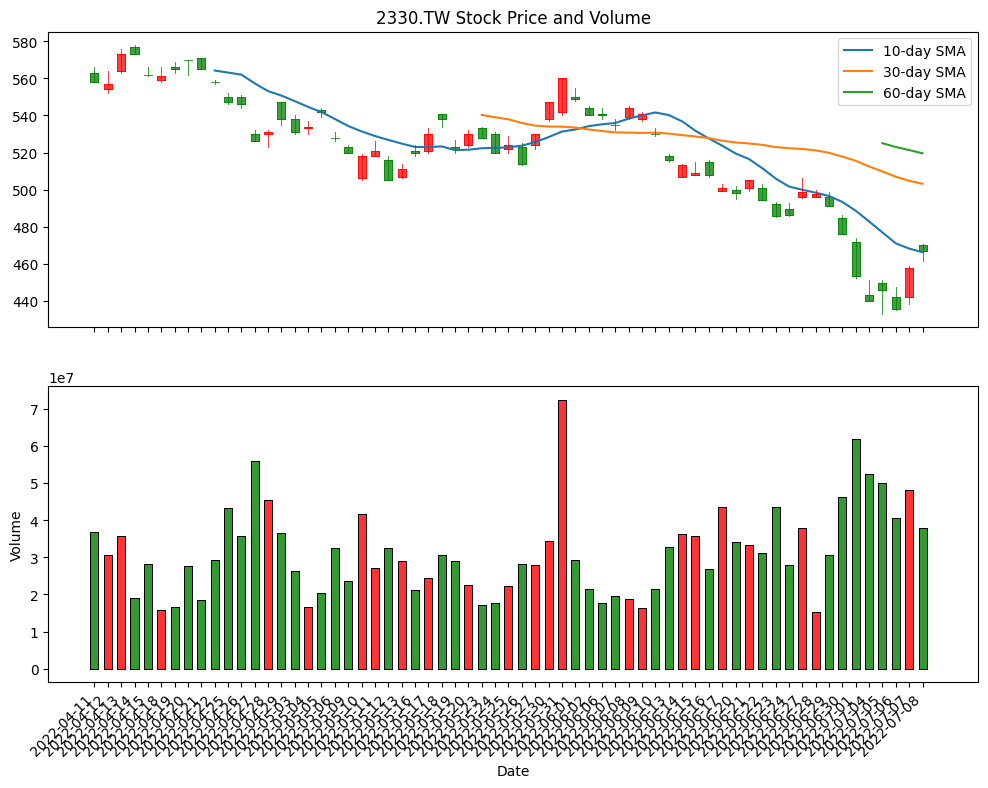

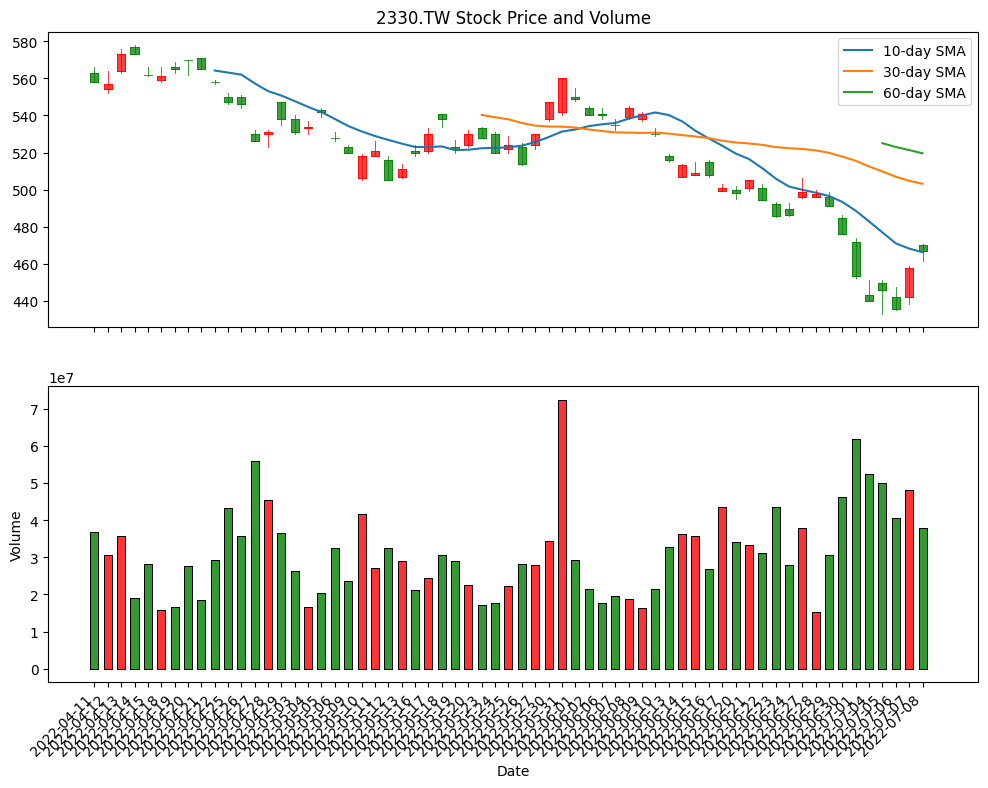

In [16]:
# 嘗試顯示在右側,可以圖表被我不小心改成左右而非上下
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_finance as mpf
import seaborn as sns
import talib
import yfinance as yf
from datetime import datetime
from tkinter import *

def plot_stock():
    # get the ticker symbol and time period from the entries
    ticker = entry_ticker.get()
    start_date = datetime.strptime(entry_start_date.get(), '%Y-%m-%d')
    end_date = datetime.strptime(entry_end_date.get(), '%Y-%m-%d')
    
    # download data from Yahoo Finance
    df = yf.download(ticker, start=start_date, end=end_date)
    
    # convert index to string format with '%Y-%m-%d'
    df.index = df.index.strftime('%Y-%m-%d')

    # calculate moving averages
    sma_10 = talib.SMA(np.array(df['Close']), 10)
    sma_30 = talib.SMA(np.array(df['Close']), 30)
    sma_60 = talib.SMA(np.array(df['Close']), 60)

    # create figure and axis
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

    # plot moving averages and candlestick chart
    axs[0].plot(sma_10, label='10-day SMA')
    axs[0].plot(sma_30, label='30-day SMA')
    axs[0].plot(sma_60, label='60-day SMA')
    mpf.candlestick2_ochl(axs[0], df['Open'], df['Close'], df['High'], df['Low'],
                          width=0.6, colorup='r', colordown='g', alpha=0.75)

    # set x-axis ticks and labels for the candlestick chart
    axs[1].set_xticks(range(0, len(df.index), 1))
    axs[1].set_xticklabels(df.index[::1], rotation=45, ha='right')

    # plot volume chart
    mpf.volume_overlay(axs[1], df['Open'], df['Close'], df['Volume'],
                       colorup='r', colordown='g', width=0.6, alpha=0.8)

    # set title and legend
    axs[0].set_title(f'{ticker} Stock Price and Volume')
    axs[0].legend()
    axs[1].set_xlabel('Date')

    # set title and labels for volume chart
#     axs[1].set_title('Volume')
    axs[1].set_ylabel('Volume')

    # create a Tkinter window
    root = tk.Tk()
    root.title(f'{ticker} Stock Price')

    # add a Matplotlib figure to the Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # add a Matplotlib toolbar to the Tkinter window
    toolbar = NavigationToolbar2Tk(canvas, root)
    toolbar.update()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # show the Tkinter window
    tk.mainloop()

# create GUI window
root = Tk()
root.title("Stock Price Chart")

# create labels and entries for ticker symbol and time period
label_ticker = Label(root, text="股票代號:")
label_ticker.grid(row=0, column=0)
entry_ticker = Entry(root)
entry_ticker.grid(row=0, column=1)

label_start_date = Label(root, text="開始日期 (YYYY-MM-DD):")
label_start_date.grid(row=1, column=0)
entry_start_date = Entry(root)
entry_start_date.grid(row=1, column=1)

label_end_date = Label(root, text="結束日期 (YYYY-MM-DD):")
label_end_date.grid(row=2, column=0)
entry_end_date = Entry(root)
entry_end_date.grid(row=2, column=1)

# create button to display stock chart
button_plot = Button(root, text="顯示圖表", command=plot_stock)
button_plot.grid(row=3, column=1)

root.mainloop()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_finance as mpf
import seaborn as sns
import talib
import yfinance as yf
from datetime import datetime
from tkinter import *
import tkinter as tk
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.backends.backend_tkagg import NavigationToolbar2Tk
def plot_stock():
    # get the ticker symbol and time period from the entries
    ticker = entry_ticker.get()
    start_date = datetime.strptime(entry_start_date.get(), '%Y-%m-%d')
    end_date = datetime.strptime(entry_end_date.get(), '%Y-%m-%d')
    
    # download data from Yahoo Finance
    df = yf.download(ticker, start=start_date, end=end_date)
    
    # convert index to string format with '%Y-%m-%d'
    df.index = df.index.strftime('%Y-%m-%d')

    # calculate moving averages
    sma_10 = talib.SMA(np.array(df['Close']), 10)
    sma_30 = talib.SMA(np.array(df['Close']), 30)
    sma_60 = talib.SMA(np.array(df['Close']), 60)

    # create figure and axis
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[2, 1])

    ax0 = fig.add_subplot(gs[0])
    ax1 = fig.add_subplot(gs[1], sharex=ax0)

    # plot moving averages and candlestick chart
    ax0.plot(sma_10, label='10-day SMA')
    ax0.plot(sma_30, label='30-day SMA')
    ax0.plot(sma_60, label='60-day SMA')
    mpf.candlestick2_ochl(ax0, df['Open'], df['Close'], df['High'], df['Low'],
                          width=0.6, colorup='r', colordown='g', alpha=0.75)

    # set x-axis ticks and labels for the candlestick chart
    ax0.set_xticks(range(0, len(df.index), 10))
    ax0.set_xticklabels(df.index[::10], rotation=45, ha='right')

    # plot volume chart
    mpf.volume_overlay(ax1, df['Open'], df['Close'], df['Volume'],
                       colorup='r', colordown='g', width=0.6, alpha=0.8)

    # set title and legend
    ax0.set_title(f'{ticker} Stock Price')
    ax0.legend()

    # create a Tkinter window
    root = tk.Tk()
    root.title(f'{ticker} Stock Price')

    # add a Matplotlib figure to the Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # add a Matplotlib toolbar to the Tkinter window
    toolbar = NavigationToolbar2Tk(canvas, root)
    toolbar.update()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # show the Tkinter window
    tk.mainloop()

# create GUI window
root = Tk()
root.title("Stock Price Chart")

# create labels and entries for ticker symbol and time period
label_ticker = Label(root, text="股票代號:")
label_ticker.grid(row=0, column=0)
entry_ticker = Entry(root)
entry_ticker.grid(row=0, column=1)

label_start_date = Label(root, text="開始日期 (YYYY-MM-DD):")
label_start_date.grid(row=1, column=0)
entry_start_date = Entry(root)
entry_start_date.grid(row=1, column=1)

label_end_date = Label(root, text="結束日期 (YYYY-MM-DD):")
label_end_date.grid(row=2, column=0)
entry_end_date = Entry(root)
entry_end_date.grid(row=2, column=1)

# create button to display stock chart
button_plot = Button(root, text="顯示圖表", command=plot_stock)
button_plot.grid(row=3, column=1)

root.mainloop()